### Trajectory analysis of Breast Cancer using PILOT-GM-VAE

Welcome to the  PILOT-GM-VAE Package Tutorial for scRNA Data!

Here we show the whole process for how train the model and apply PILOT-GM-VAE to scRNA data using Breast Cancer scRNA Data, you can download the Anndata (h5ad) file from the provided link in the manuscript.

In [2]:
from pilot_gm_vae import *
import scanpy as sc

#### Reading Anndata

In [3]:
file_path = '/data/scRNA/Patients_scRNA/data/under_proccessing/Kumar_BreastCncr_processed_harmony.h5ad'
adata=sc.read_h5ad(file_path)

#### Loading the required information for training the model

In order to work with  PILOT-GM-VAE, ensure that your Anndata object is loaded and contains the required information.
Use the following parameters to configure  PILOT-GM-VAE  for your analysis (Setting Parameters):

adata: Pass your loaded Anndata object to PILOT-GM-VAE.

dataset_name : Name of the dataset for saving the model in the trained_moldes folder.

pca_key: Provide the name of the variable in the obsm level that holds the dimension reduction (PCA representation).

load_weights: Load pre-trained weights if available (if already trained the model set it True).

num_classes: Number of components. (For Breast Cancer, we set this to 10, similar to the number of the cell types in the object.)

You can change other hyperparameters such as the number of epochs, the size of the layers so on.

In [4]:
model = train_gmvae(
    adata=adata,
    dataset_name= "Breast",
    pca_key= 'X_pca_harmony',
    load_weights= True,
    num_classes= 10,
    epochs= 100
)

Loaded pre-trained weights from ./trained_models/Breast/gmvae_weights.pth.
Performing inference...
Done!


#### Loading the pre-estimated distances between samples.
If you train your model, please skip this part and go to the next part (Estimating distances between samples wiht the Wasserstein distance).

In [5]:
adata.uns['EMD']=np.load('trained_models/Breast/EMD.npy')

#### Estimating distances between samples wiht the Wasserstein distance.

Use the following parameters to configure PILOT-GM-VAE for your analysis (Setting Parameters):

adata: Pass your loaded Anndata object to PILOT-GM-VAE.

emb_matrix: Provide the name of the variable in the obsm level that holds the dimension reduction (PCA representation).

sample_col: Indicate the column name in the observation level of your Anndata that contains information about samples or patients.

status: Provide the column name that represents the status or disease (e.g., “control” or “case”).

wass_dis: If you have already computed the disatnces, such the above code that we loaded the EMD, please set this False, otherwise set this True.  


In [6]:
gmmvae_wasserstein_distance(adata,
emb_matrix = 'X_pca_harmony',
sample_col = 'accSample',
status = 'accLabel',
wass_dis=False)

#### Trajectory
Here we show the Diffusion map of Wasserstein distance.

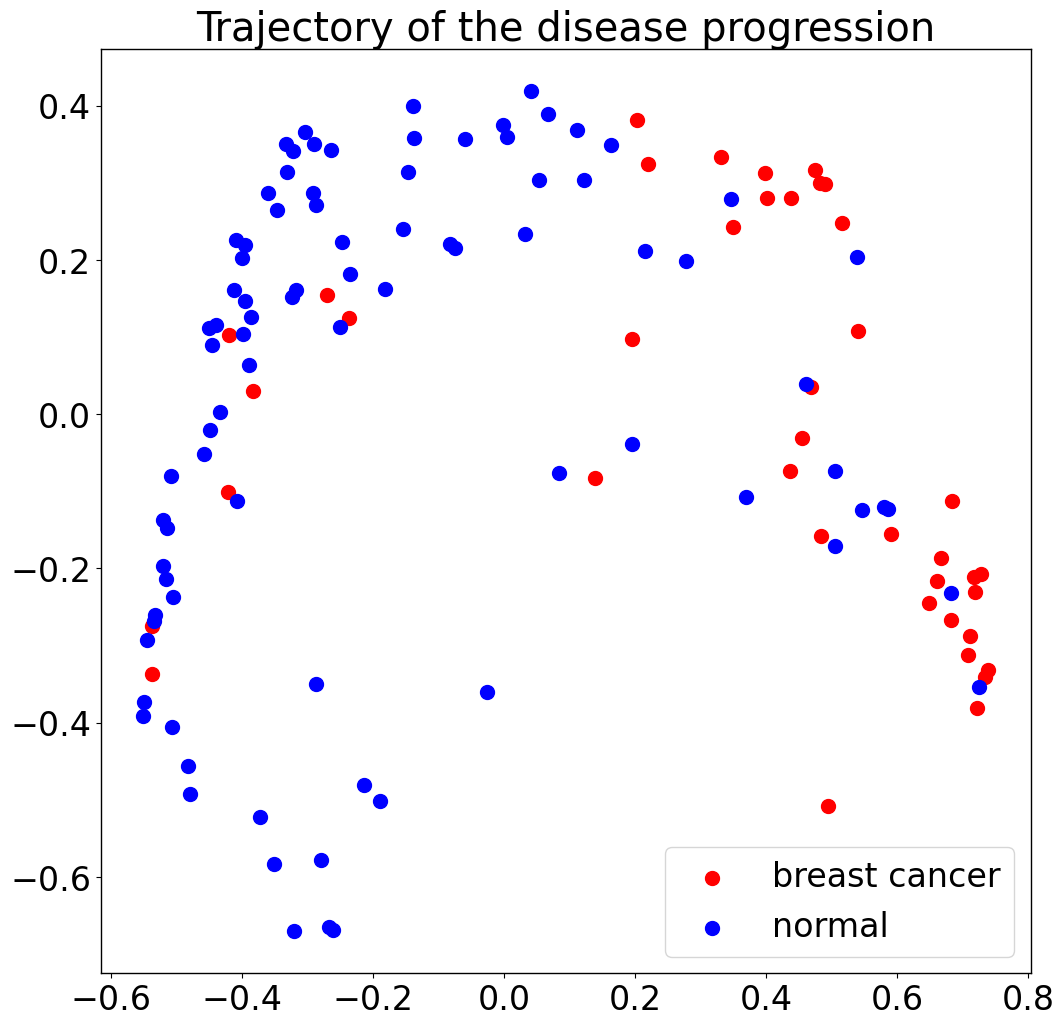

In [8]:
trajectory(adata, colors = ['red','blue','green','yellow','pink'],location_labels= 'best',knn=8)

#### Fit a principal graph.
The difussion map creates an embedding that potentially reveals a trajectory in the data. Next, PILOT-GM-VAE explores EIPLGraph to find the structure of the trajectory. An important parameter is the source_node, which indicates the start of the trajectory. Here, we selected a normal sample (node with id = 0). This method returns ranked samples, which we define as a disease progression score (t = t1, ..., tn), where tl represents the ranking of the nth sample.

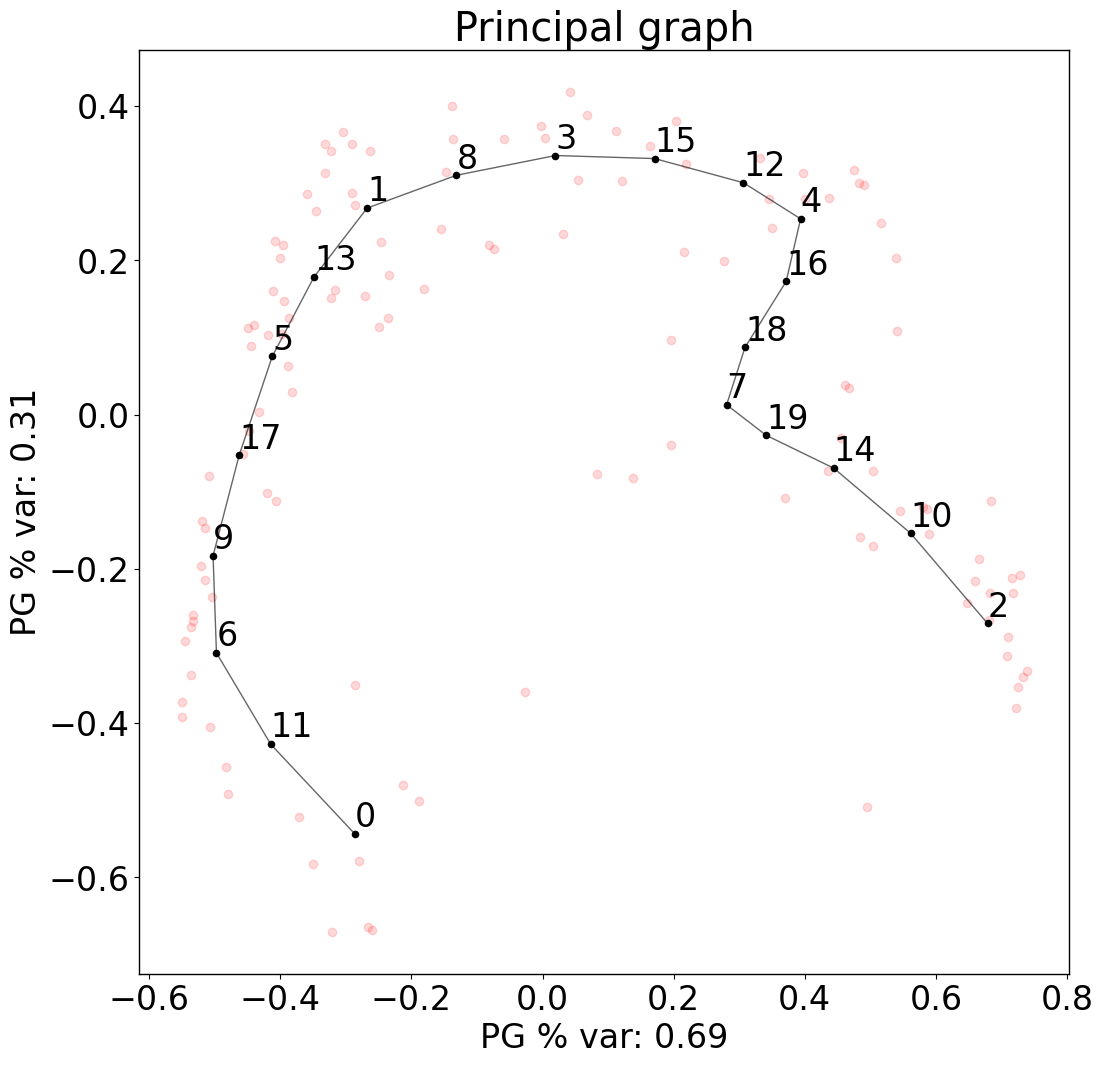

In [9]:
fit_pricipla_graph(adata, source_node =0)

#### Component importance
Next, we can use the robust regression model to find components whose proportions change linearly or non-linearly with disease progression. 

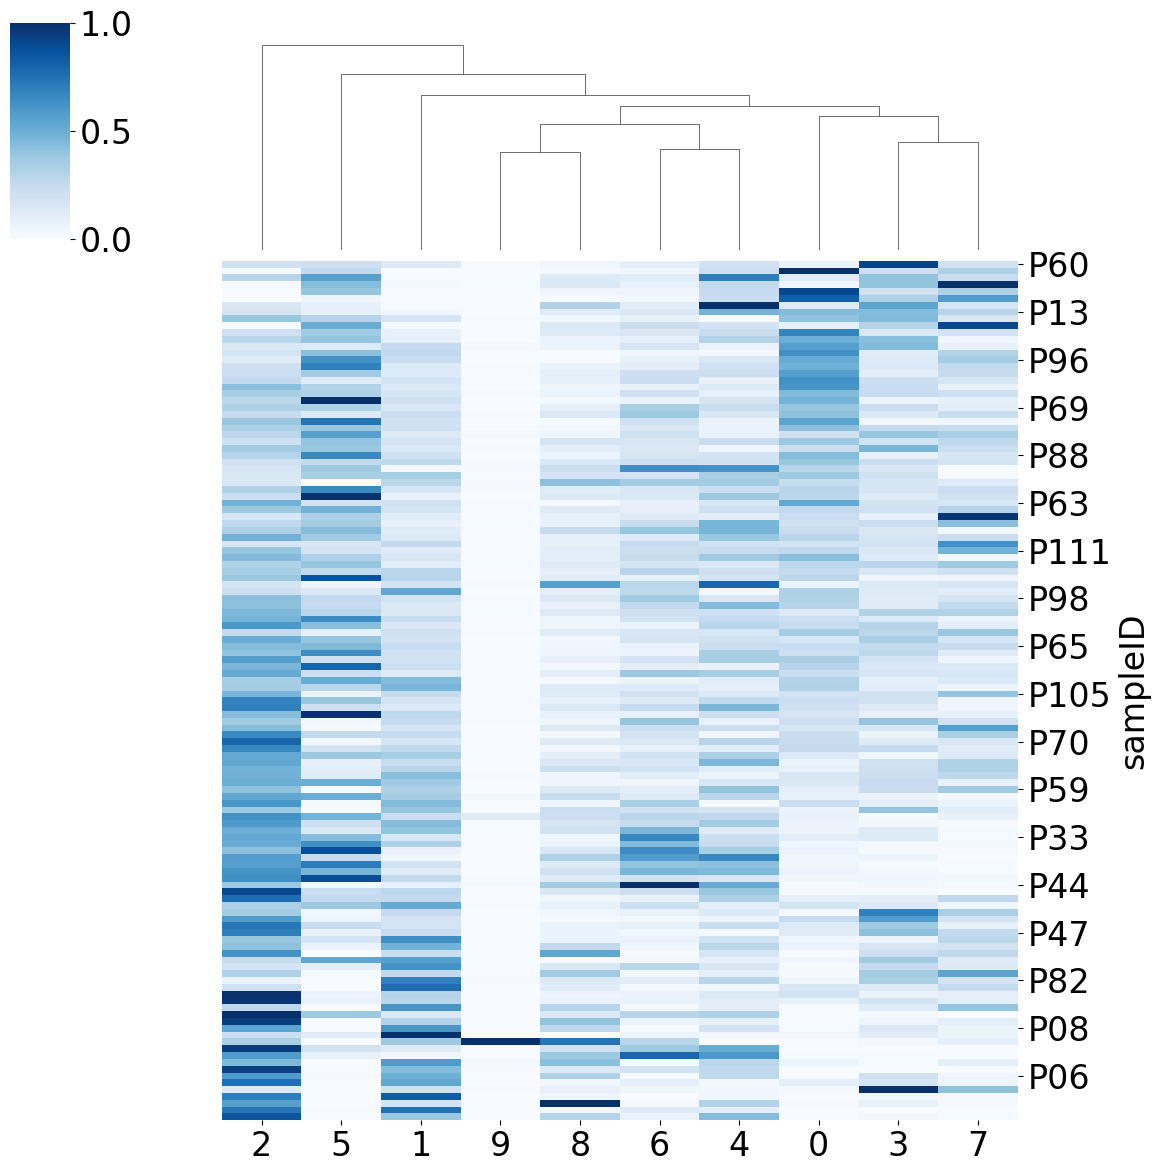

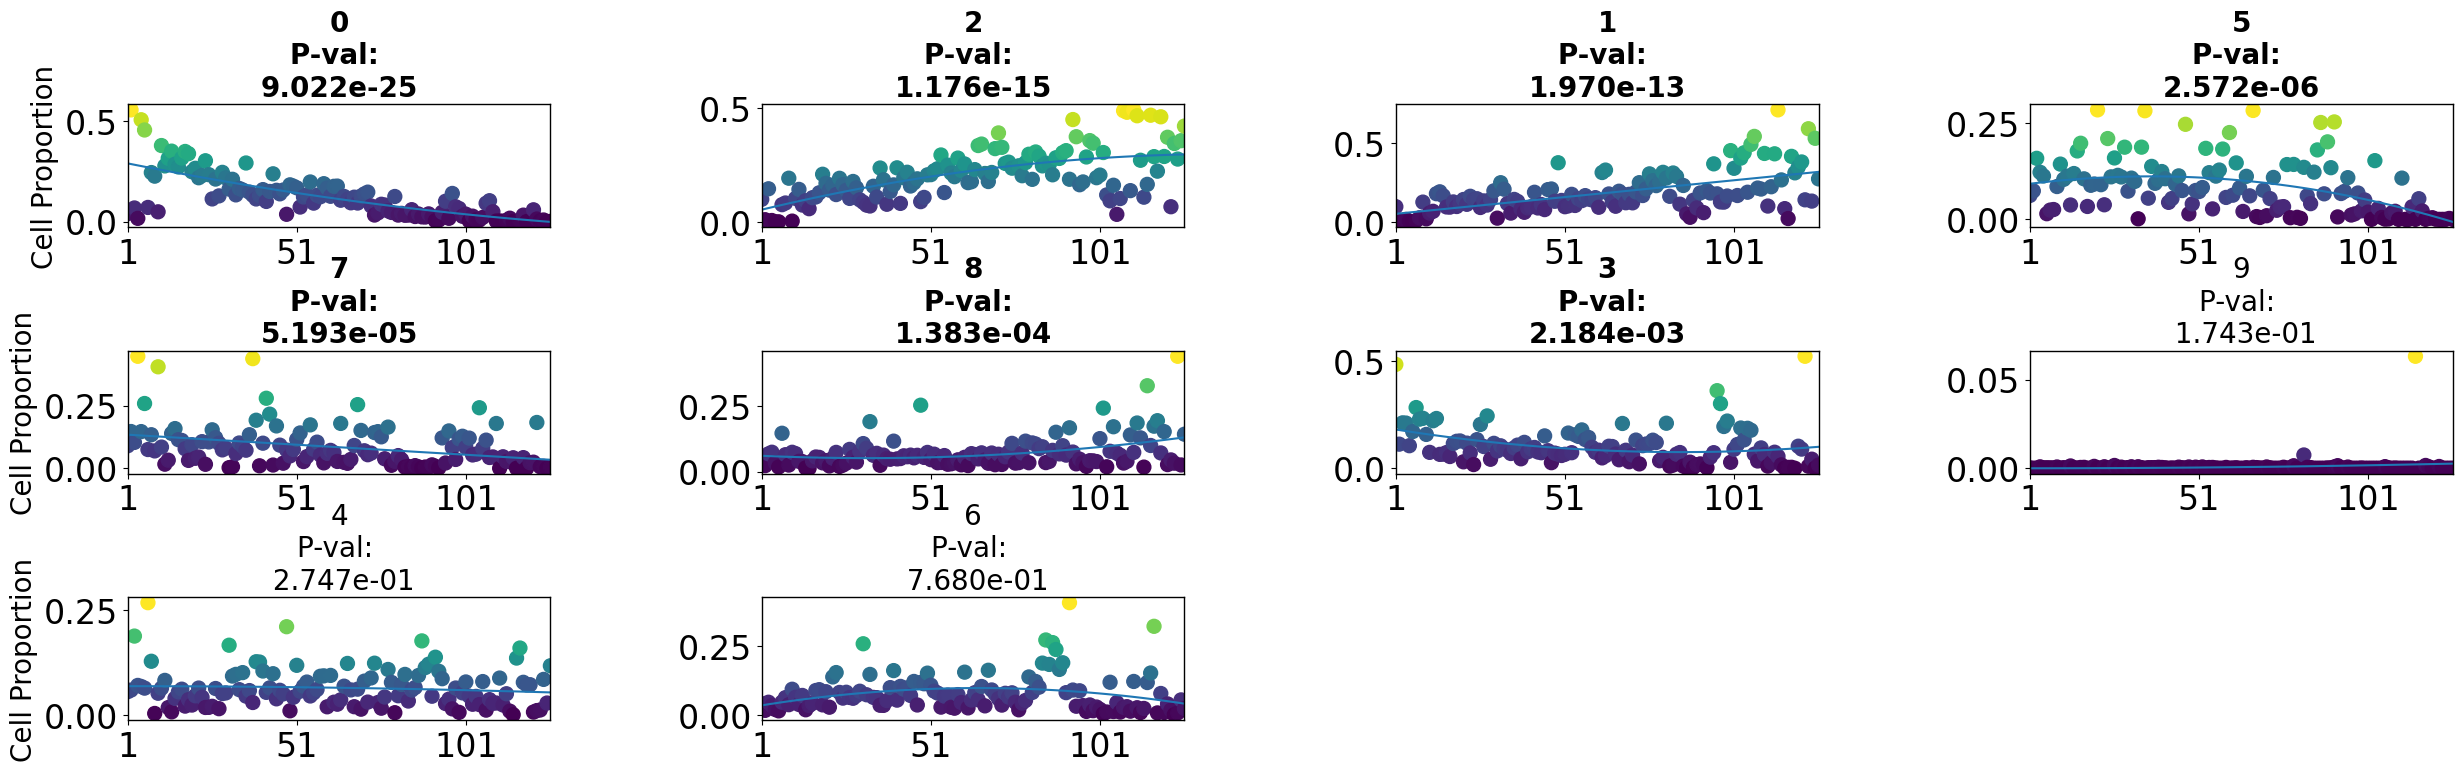

In [10]:
cell_importance(adata,width=30,height=8,xlim=50)

#### Checking the consistency between the found components and the cell types.

Please set the colum name for cell_type_col in your adata for the following function. 

Here, we color the umap based on the found components by the model and the cell types to see how much they match, next we can annotate some of the components which are completely match with cell types. 

As you see in the results, there are perfect matches between almost all components, only two on them are mix of a few cell types. You also see that the compoenets 9 here has a few cell inside that we can remove it as bad qulity cells.



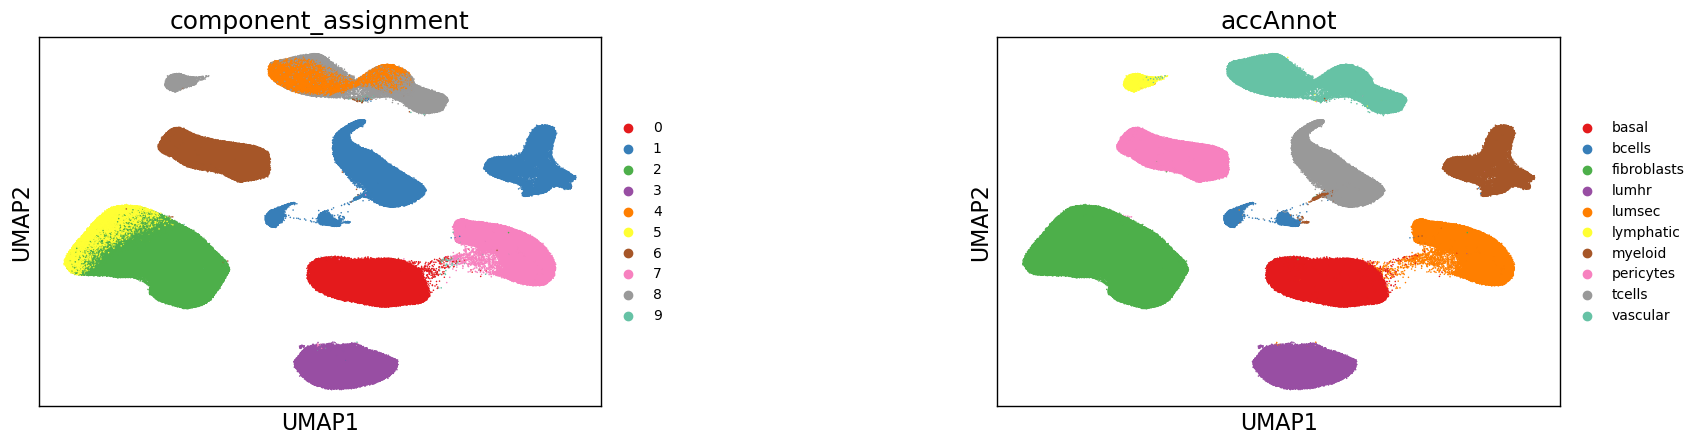

<Figure size 1400x800 with 0 Axes>

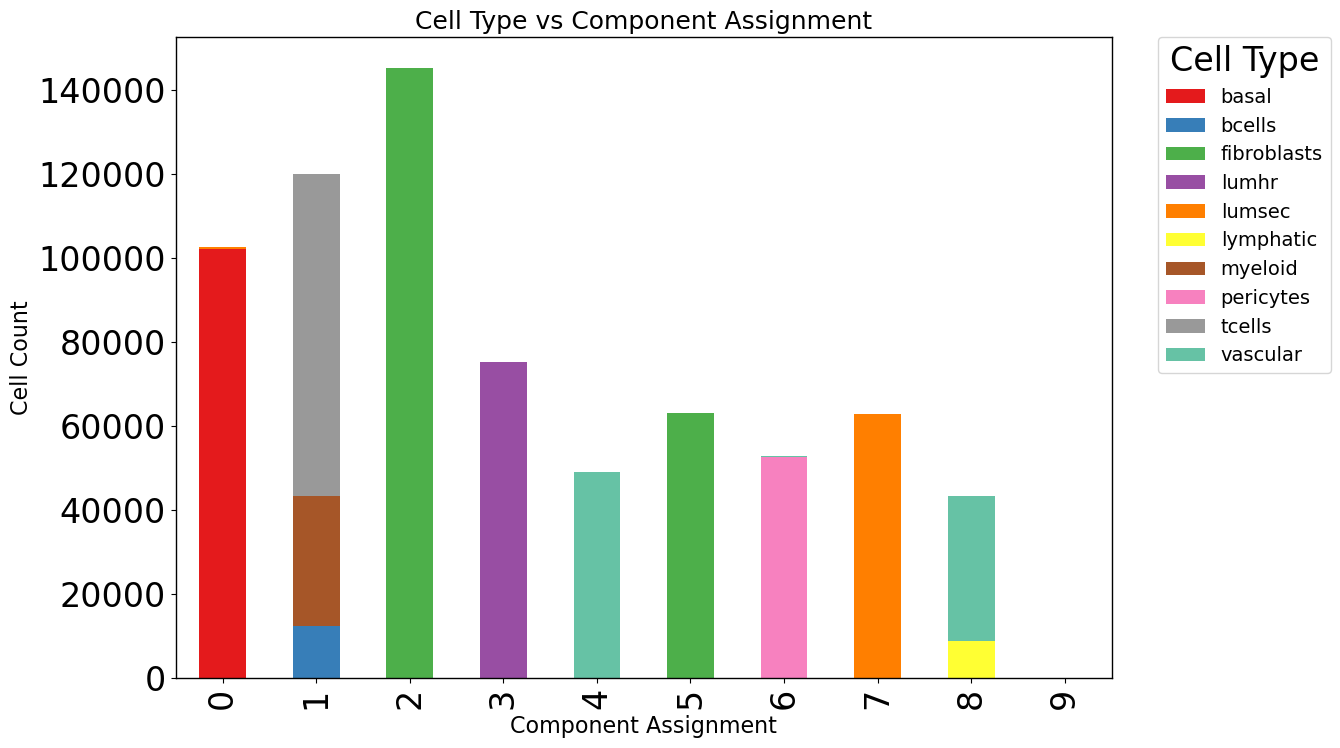

In [12]:
plot_umap_and_stacked_bar(adata,cell_type_col='accAnnot')

### Applying PILOT-GM-VAE for finding Markers

#### Gene selection: 

Given that we found interesting components, we can investigate genes associated with these trajectories, i.e., genes whose expression changes linearly or quadratically with the disease progression.

For doing this part, you can follow easily what is mentioned in the [PILOT tutorial](https://pilot.readthedocs.io/en/latest/Myocardial_infarction.html#gene-selection).
